<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EA%B8%B0%EB%A7%90%EB%8C%80%EC%B2%B4_%EB%82%A0%EC%94%A8%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [ ]:
from zipfile import ZipFile

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip" # 날씨 데이터 다운로드
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path) # 파일 열기
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv" # csv 경로 지정

df = pd.read_csv(csv_path) # 파일 읽기

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


데이터 시각화

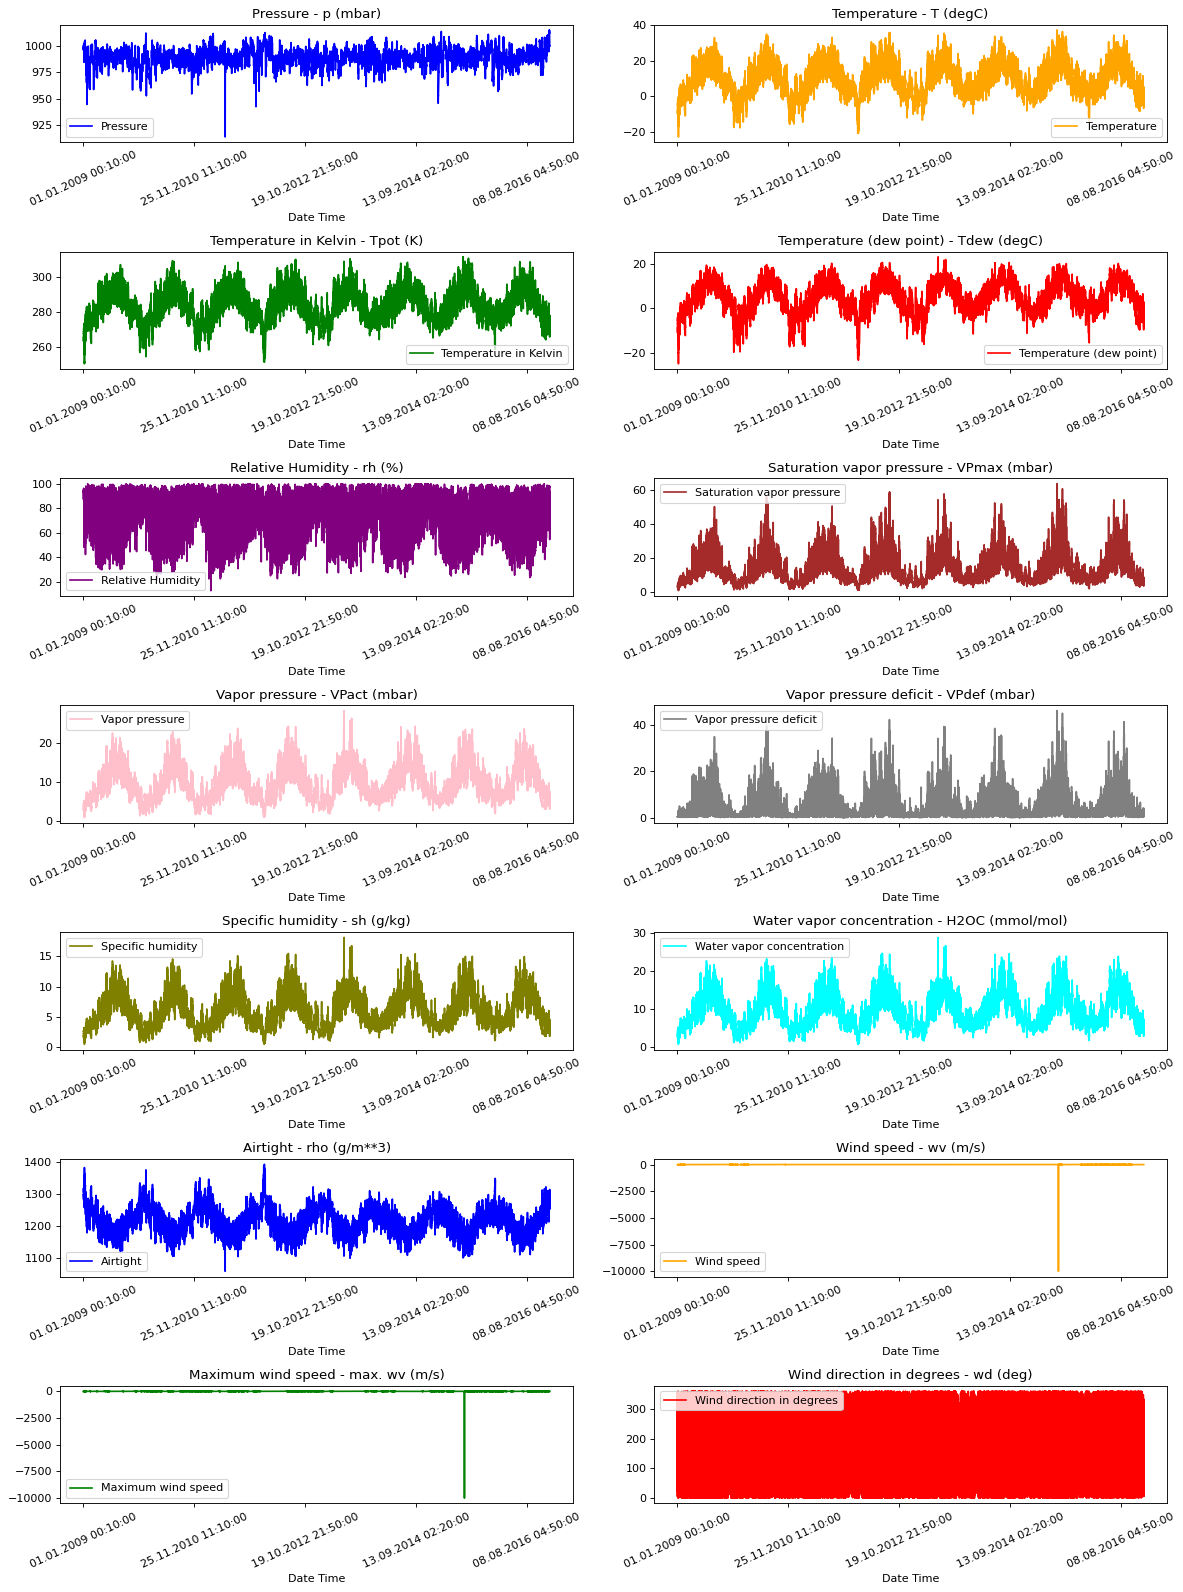

In [ ]:
titles = [     # 각 변수의 이름 저장 - 그래프의 제목으로 사용됨
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [   # 각 열의 실제 이름(키)
    "p (mbar)",    # titles와 대응되며 특정 기후 데이터를 선택할 떄 사용
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [   #그래프에서 사용할 색상
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"  # 시간 데이터를 나타내는 열의 이름  ex) 01.01.2009 00:10


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    ) # 총 7행 2열로 구성된 서브플롯 생성 그래프 크기는(15,20)
    for i in range(len(feature_keys)): # feature_keys에 있는 모든 변수(key)에 대해 반복
        key = feature_keys[i]         # 변수마다 t_data를 추출하고 시각화
        c = colors[i % (len(colors))]  # 정의된 색상 리스트에서 순환적으로 색상을 선택
        t_data = data[key]
        t_data.index = time_data      # 각 변수의 데이터를 시간 축에 맞게 설정
        t_data.head()                 # 데이터프레임의 처음 5개 행 출력
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],   # 현재 서브 플롯에 그래프를 그림
            color=c,
            title="{} - {}".format(titles[i], key), # titles은 titles와 feature_keys를 조합해 생성
            rot=25,                                 # x축 레이블을 25도 회전
        )
        ax.legend([titles[i]])
    plt.tight_layout() # 서브플롯 간 간격을 자동으로 조정하여 보기 좋게 정리


show_raw_visualization(df)

데이터 전처리

In [ ]:
split_fraction = 0.715 # 훈련 데이터와 테스트 데이터를 분리하는 비율
train_split = int(split_fraction * int(df.shape[0])) # df.shape[0] 데이터프레임의 행의수 즉 데이터의 총 개수를 가져옴
# 훈련 데이터의 개수를 정확하게 계산하고 이를 정수로 변환하기위해 코드 필요
step = 6 # 샘플링 간격
# 샘플링은 데이터에서 일정한 규칙에 따라 특정 구간의 값을 선택하는 과

past = 720 # 모델이 예측을 하기 위해 사용하는 과거 데이터의 길이
future = 72 # 모델이 예측할 미래 데이터의 길이
learning_rate = 0.001 # 학습률, 모델이 가중치를 업데이트 하는 속도 제어
batch_size = 256 #
epochs = 10

# 정규화를 하기 위한 코드
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0) # 훈련데이터만 선택 train_split에서 계산된 데이터가 훈련 데이터
    data_std = data[:train_split].std(axis=0) # 훈련데이터의 각 열에 대해 표준편차 계산
    return (data - data_mean) / data_std # 데이터 포인트에서 훈련 데이터의 평균을 뺴고 훈련데이터의 표준편차로 나누어 정규화함

In [ ]:
# 선택된 각 열의 특성들의 이름을 출력 - 많은 정보를 학습시키는것보단 필요한 일부만 추출하는것이 좋음
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]] # 선택된 열의 이름을 저장
features = df[selected_features] # df에서 selected에 해당하는 열들만 추출하여 features에 저장
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split) # 데이터 정규화
features = pd.DataFrame(features) # 정규화된 데이터를 다시 데이터프레임 형태로 변환
features.head()

train_data = features.loc[0 : train_split - 1] # 훈련 데이터 선택 0번 인덱스부터  train_split - 1까지의 데이터를 훈련데이터로 선택
val_data = features.loc[train_split:] # train_split부터 마지막까지의 데이터를 검증데이터로 선택

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


학습 데이터 세트

In [ ]:
start = past + future # 예측하려는 데이터를 선택하기 위한 시작 인데스를 정의 / 슬라이딩 윈도우 방식
end = start + train_split # 훈련데이터에서 예측하려는 기간이 끝나는 지점을 설명

x_train = train_data[[i for i in range(7)]].values # 훈련 데이터의 입력 데이터 - train_데이터는 이미 전처리된 훈련데이터 / .values: pandas객체를 numpy배열로 변환
y_train = features.iloc[start:end][[1]] # 모델의 출력값, 즉 예측하고자 하는 값/ features의 1번째 열만 선택

sequence_length = int(past / step) # 입력 시퀸스의 길이 설정 / 과거 데이터를 몇개의 샘플로 나눠서 모델에 입력할지 결정
#시퀀스 길이를 정하지 않으면 모델이 과도하게 복잡해지거나 노이즈를 학습할수 있음
#따라서 실제로 중요한 시간 간격만 잡고 그 패턴을 학습하는것이 중요

In [ ]:
# timeseries: 시계열 데이터를 batch형태로 나누어 훈련 데이터셋을 만들어줌
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train, # 720시간 과거데이터를 6시간으로 샘플링한 총 120개의 과거 데이터
    y_train, # 예측하려는 72시간의 데이터 - 즉 미래의 데이터 의미
    sequence_length=sequence_length, # 시퀀스의 길이 지정
    sampling_rate=step, # 샘플링 간격 = 6
    batch_size=batch_size, # batch_size = 256
)

유효성 검사 데이터 세트

In [ ]:
# 검증데이터에서 입력 시퀀스를 추출할때 x_val에 포함할수 있는 마지막 인덱스 계산
# x_val을 만들때 각 시퀀스는 past의 길이를 가져오고 y_val은 future길이 이후 데이터를 사용 따라서 검증 데이터 끝부분에서는 past와 future의 길이만큼 충분한 데이터가 없으므로 그범위를 제외
x_end = len(val_data) - past - future # val_data는 train_data  뒤에 위치한 검증 데이터, 과거(720시간)와 미래(72시간)에 필요한 데이터 범위를 제외한 나머지 데이터를 검증에 사용

label_start = train_split + past + future # label_start는 y값의 시작 인덱스를 정의, 훈련데이터와 p

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values # 검증데이터에 7개의 특성 선택
# val_data는 이미 7개의 특성이 뽑아져 있는 상태이므로 뒤에 [[i for i in range(7)]]는 생략 가능
y_val = features.iloc[label_start:][[1]] # feature의 데이터에서 두 번째 열을 선택한 후 label_start부터 끝까지의 데이터를 가져옴

# 검증 데이터를 처리하는데 필요한 시퀀스 데이터를 생성
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val, # 검증데이터에서 추출한 입력 특성 데이터, 과거720시간으로 이루어져 있으면 각 시퀀스는 120시간만큼 잘려져서 모델학습에 사용
    y_val, # 검증 데이터에서 추출한 예측 대상 값
    sequence_length=sequence_length, # 120시간
    sampling_rate=step, # 6시간
    batch_size=batch_size,
)


for batch in dataset_train.take(1): # dataset_trian에서 첫번째 배치만 가져오라는 의
    inputs, targets = batch # input: 과거 데이터, targets: 미대 데이터

print("Input shape:", inputs.numpy().shape) # 256 배치크기, 120 시퀀스 길이, 7 특성의 수
print("Target shape:", targets.numpy().shape) # 256 배치크기, 1: 타겟의 수(타겟은 모델이 예측하려는 값의 수) = 우리는 temperature 예측 중

Input shape: (256, 120, 7)
Target shape: (256, 1)


훈련

In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# inputs는 데이터셋을 의미, inputs.shape[1]은 시퀀스의 길이 (즉 과거 120시간의 과거 데이터시퀀스), inputs.shape[2]는 각 시점마다 제공되는 특성의 개수(7개)
lstm_out = keras.layers.LSTM(32)(inputs)
# LSTM레이어 정의, 32: 뉴런의 수, inputs: 앞에 정의한 inputs을 LSTM레이어에 입력으로 전달, 이 레이어는 시퀀스를 입력받아 32차원의 벡터로 출력
outputs = keras.layers.Dense(1)(lstm_out)
# 1: 뉴런의 수, lstm_out: LSTM 레이어에서 나온 출력을 Dense 레이어에 입력. LSTM 출력을 기반으로 최종 예측값 출력

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 120, 7)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
path_checkpoint = "model_checkpoint.weights.h5" # 학습 중에 모델의 가중치를 저장할 파일 경로 지정
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
# callbacks.EarlyStopping: 조기종료 콜백 정의, 이는 모델 학습이 특정 조건을 만족하면 더 이상 학습을 진행하지 않고 종료하는 방식
# monitour: val_loss를 모니터링, 즉 모델 학습 중 검증 데이터에서의 손실을 추적,
# min_delta = 0: 손실의 변화가 0보다 작으면 개선이 없다고 판단, 손실이 일정 수준 이하려 변화하지 않으면 학습 중단.
# patience = 5: 5번의 epoch동안 val_loss가 개선되지 않으면 학습을 중단

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    save_weights_only=True, # 모델의 가중치만 저장하고 모델 구조는 저장하지 않는다.
    save_best_only=True, # 검증 손실(val_loss)이 가장 낮을 때만 모델의 가중치를 저장, 즉 검증 손실이 더 이상 개선되지 않으면 가중치는 저장되지 않음
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 60s 51ms/step - loss: 0.1088 - val_loss: 0.1429
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 52s 45ms/step - loss: 0.1078 - val_loss: 0.1386
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 48s 41ms/step - loss: 0.1050 - val_loss: 0.1333
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 49s 42ms/step - loss: 0.1046 - val_loss: 0.1284
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - loss: 0.1042 - val_loss: 0.1239
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 54s 46ms/step - loss: 0.1033 - val_loss: 0.1237
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 54s 46ms/step - loss: 0.0995 - val_loss: 0.1239
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - loss: 0.0976 - val_loss: 0.1203
Epoch 9/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 50s 43ms/step - loss: 0.0988 - val_loss: 0.1195
Epoch 10/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - loss: 0.1006 - val_loss: 0.1130


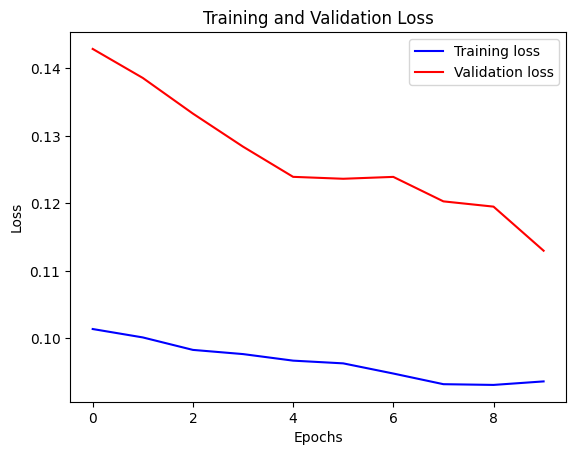

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

예언

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


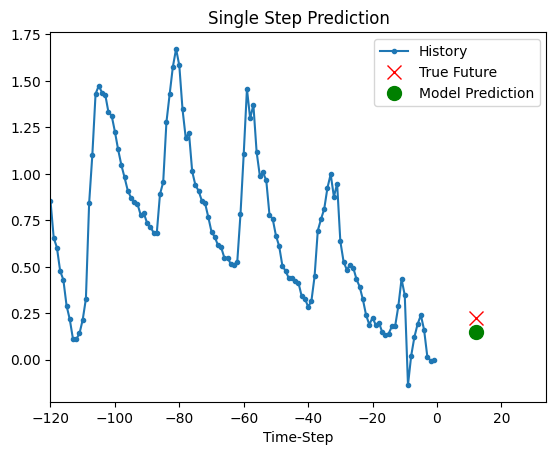

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


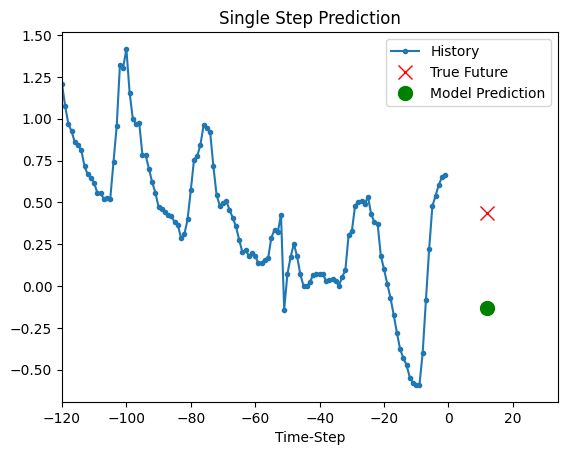

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


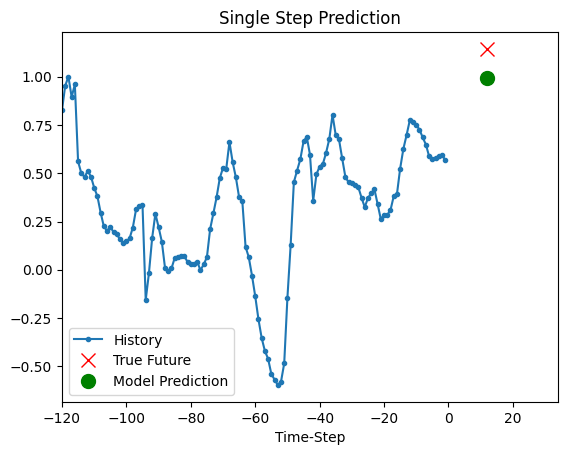

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


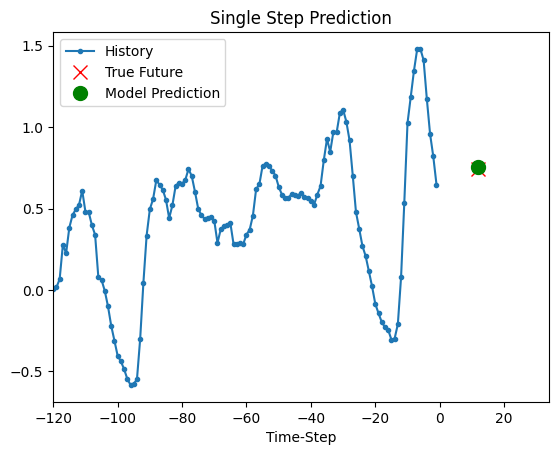

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


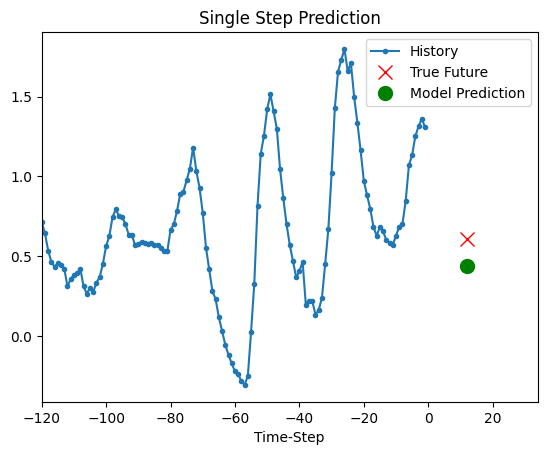

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"] # "."(과거데이터), "x"(실제값), "o"(모델 예측)
    time_steps = list(range(-(plot_data[0].shape[0]), 0)) # x축에 표시 될 시간 단위
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )